# telecom_churn
Dataset of someone telecom operators
https://www.kaggle.com/ivanhrek/telecom-churn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Прогнозируемая велечина - отток (столбец churn).

In [3]:
# удалим столбцы, которые не влияют на эту величину с точки зрения здравого смысла
# вряд ли стобец phone number может нам что-то сказать о величине оттока, дропнем его

df = df.drop(['phone number'], axis = 1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# посмотрим общую инофрмацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

Как видно, пропущенных значений в данных нет. Есть категориальные признаки (тип object) и булевские (bool). Их нужно будет перекодировать. 

In [5]:
# посмотрим на описательную статистику датафрейма по количественным признакам признакам

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# закодируем категориальные признаки
# функция кодировки

def number_encode_features(data_frame):
    result = data_frame.copy()
    encoders = {} 
    for column in result.columns:
        if result.dtypes[column] == np.object:
            uniqe_vals = set(result[column])
            coder = {word:index for index, word in enumerate(uniqe_vals)}
            encoders[column] = coder
            result[column] = result[column].map(encoders[column])
    return result, encoders

df_encoded, encoders = number_encode_features(df)


In [7]:
# отобразим закодированный датафрейм

df_encoded.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,47,128,415,1,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,34,107,415,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,17,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,34,84,408,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,18,75,415,0,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
#отобразим кодировщики

encoders

{'state': {'MN': 0,
  'VT': 1,
  'AL': 2,
  'IN': 3,
  'MO': 4,
  'SD': 5,
  'MA': 6,
  'OR': 7,
  'IL': 8,
  'WY': 9,
  'NC': 10,
  'WA': 11,
  'CO': 12,
  'HI': 13,
  'FL': 14,
  'NJ': 15,
  'WI': 16,
  'TX': 17,
  'NY': 18,
  'ID': 19,
  'CA': 20,
  'OH': 21,
  'MS': 22,
  'LA': 23,
  'ME': 24,
  'ND': 25,
  'KY': 26,
  'NH': 27,
  'WV': 28,
  'GA': 29,
  'PA': 30,
  'CT': 31,
  'DE': 32,
  'VA': 33,
  'RI': 34,
  'SC': 35,
  'DC': 36,
  'AZ': 37,
  'TN': 38,
  'NE': 39,
  'MI': 40,
  'AK': 41,
  'IA': 42,
  'AR': 43,
  'NV': 44,
  'MD': 45,
  'NM': 46,
  'OK': 47,
  'MT': 48,
  'KS': 49,
  'UT': 50},
 'international plan': {'yes': 0, 'no': 1},
 'voice mail plan': {'yes': 0, 'no': 1}}

In [8]:
# переведём стобец churn в числовой формат, запишем его в отдельную переменную, преобразуем в серию

Churn = [1 if i == True else 0 for i in df_encoded['churn']] #ответы
df_encoded['churn'] = Churn
Churn = pd.Series(Churn)
df_encoded.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,47,128,415,1,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,34,107,415,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,17,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,34,84,408,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,18,75,415,0,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
#посмотрим, какие признаки больше всего влияют на отток по корреляции

df_encoded.corr()['churn'].sort_values(ascending=False)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
voice mail plan           0.102148
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
state                    -0.005676
total intl calls         -0.052844
number vmail messages    -0.089728
international plan       -0.259852
Name: churn, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000985028CB08>,
      dtype=object)

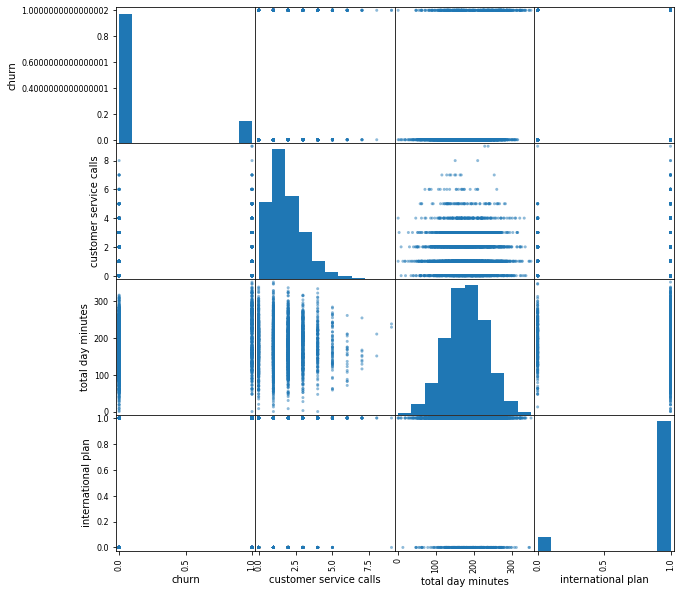

In [10]:
from pandas.plotting import scatter_matrix

at = ['churn', 'customer service calls', 'total day minutes', 'international plan'] 
scatter_matrix(df_encoded[at], figsize=(10, 10))

In [11]:
# дропнем churn из датафрейма для дальнейшего анализа

df_encoded = df_encoded.drop(['churn'], axis=1)
df_encoded.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,47,128,415,1,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,34,107,415,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,17,137,415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,34,84,408,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,18,75,415,0,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


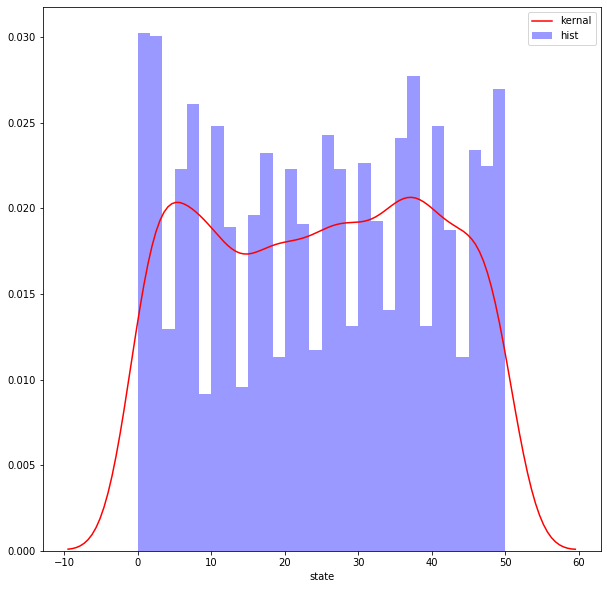

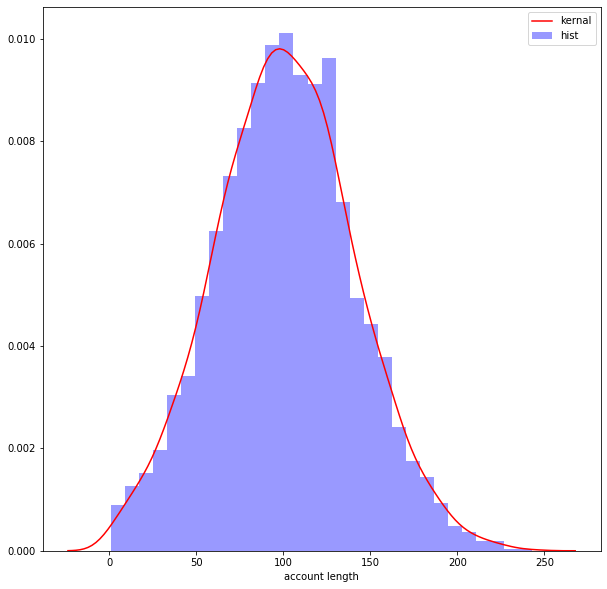

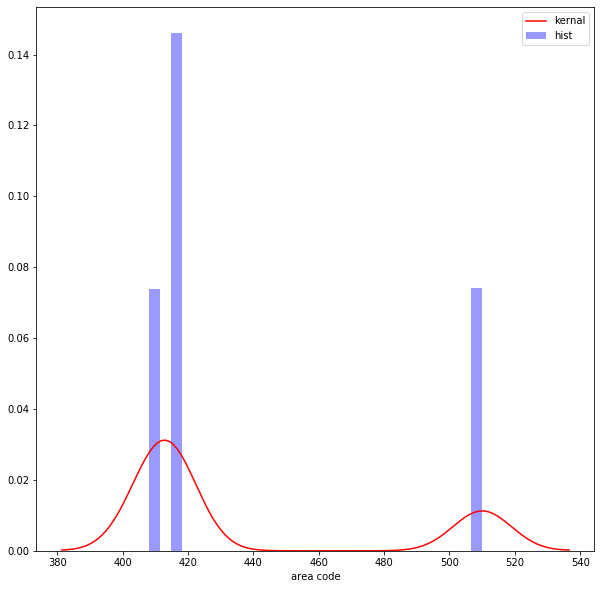

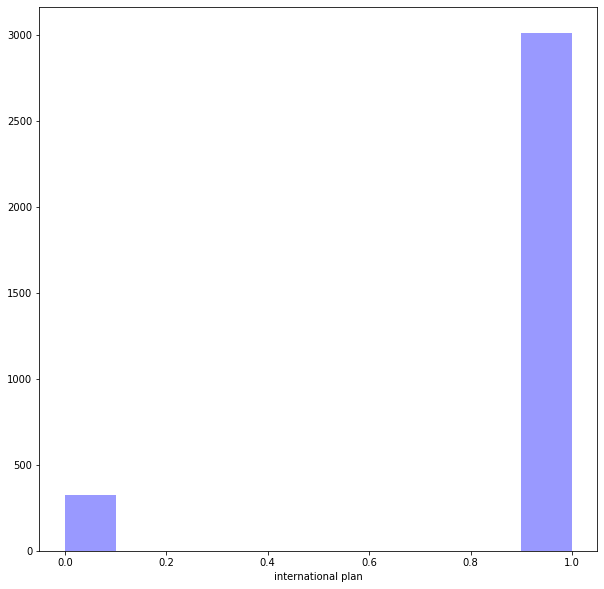

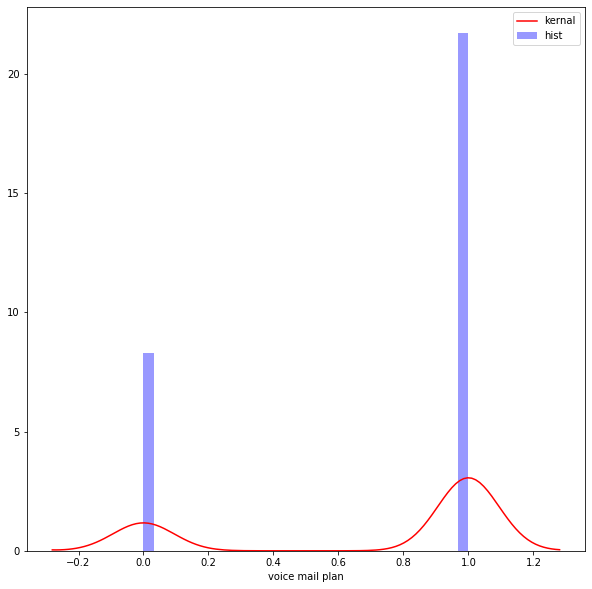

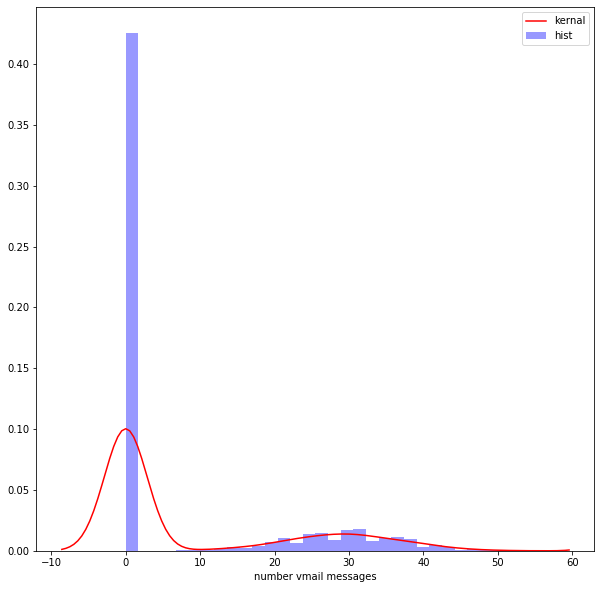

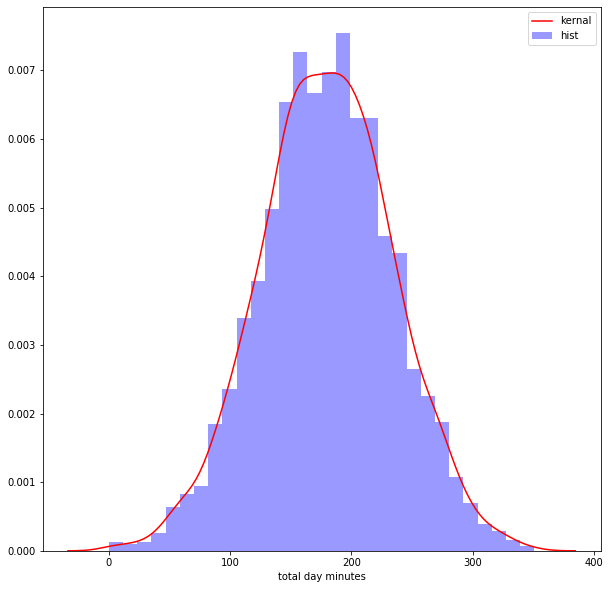

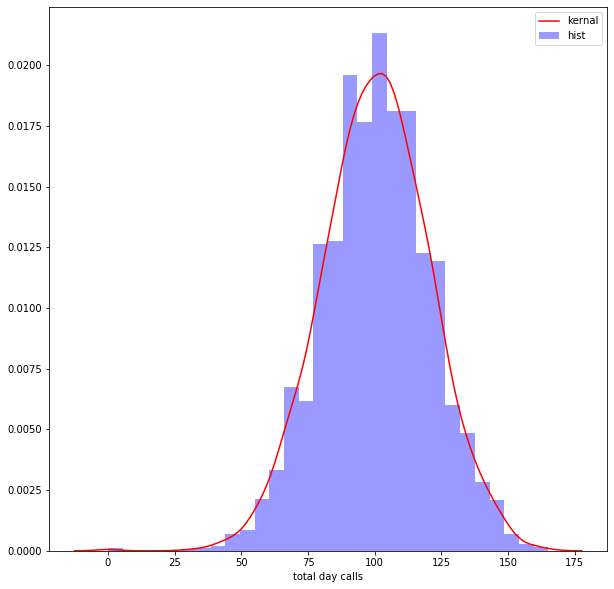

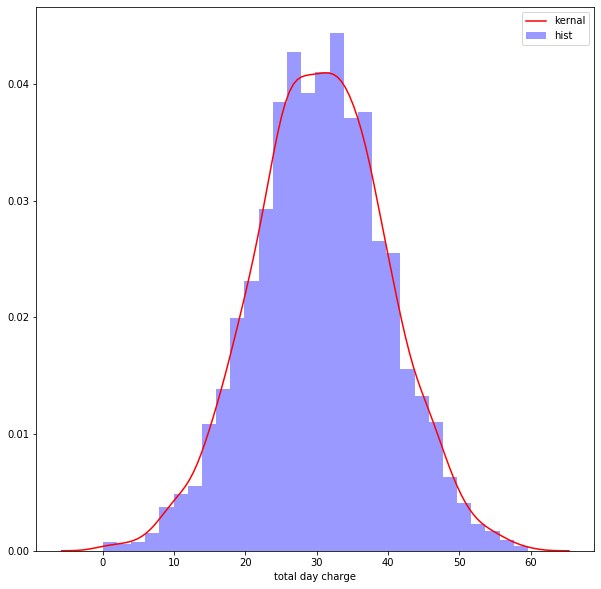

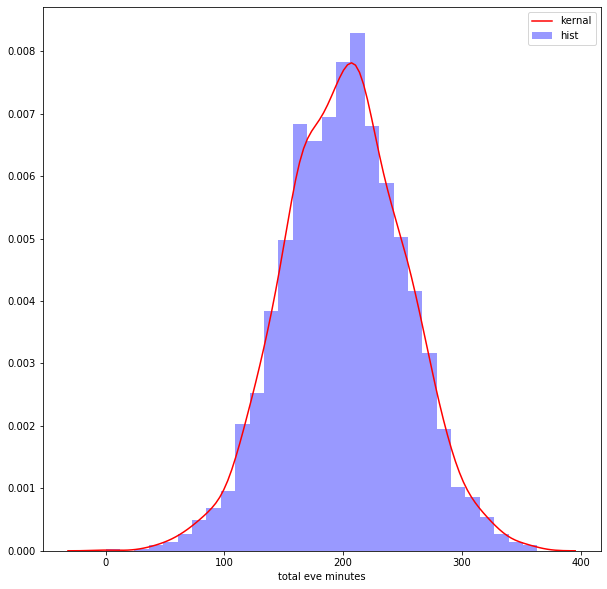

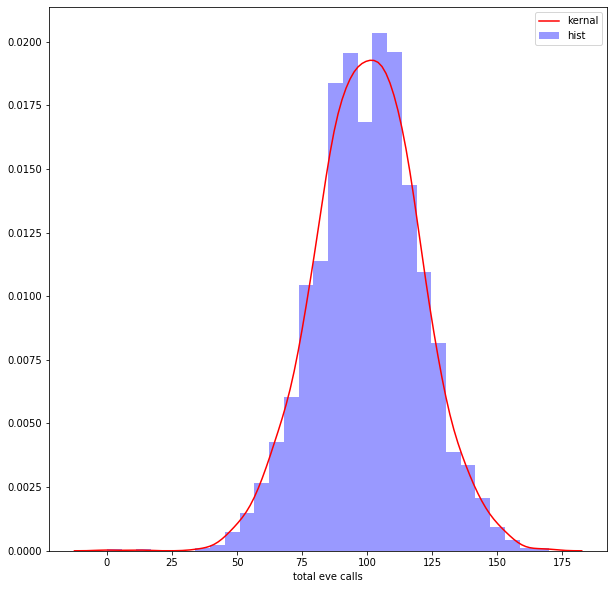

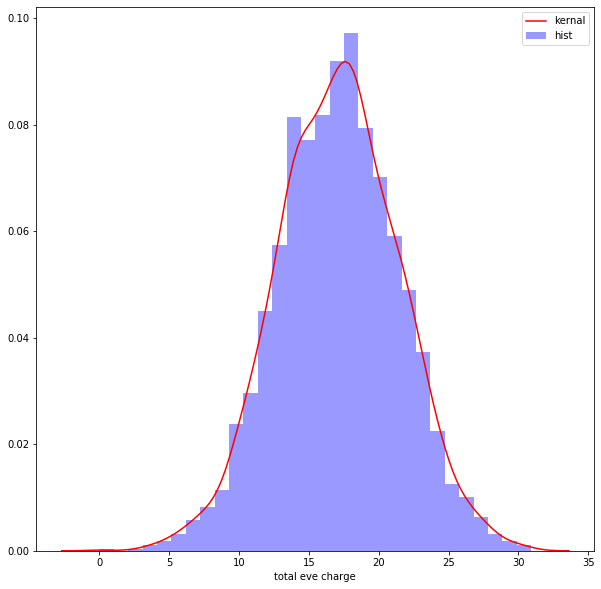

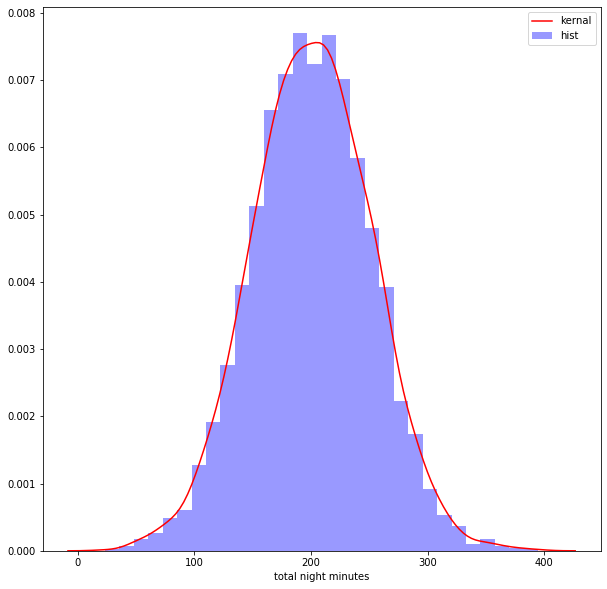

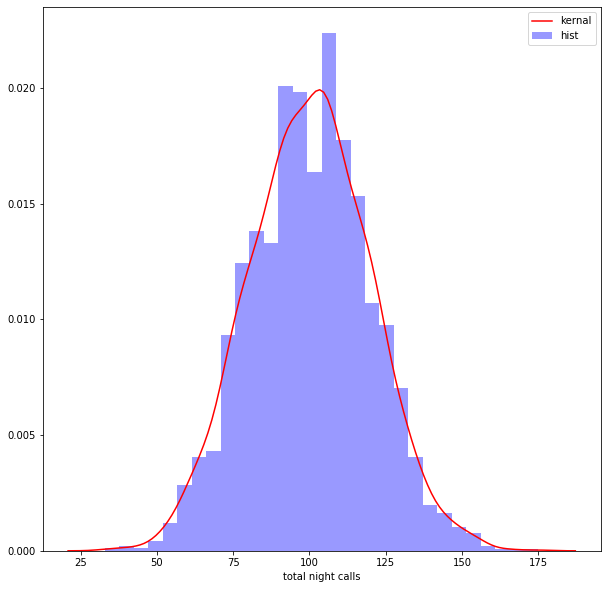

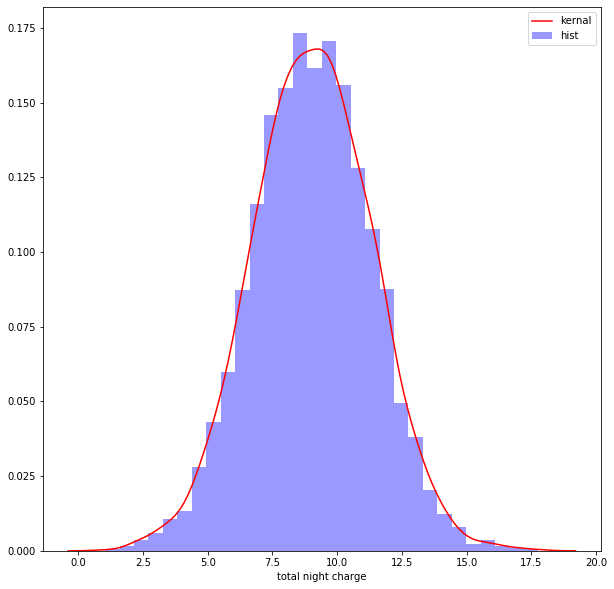

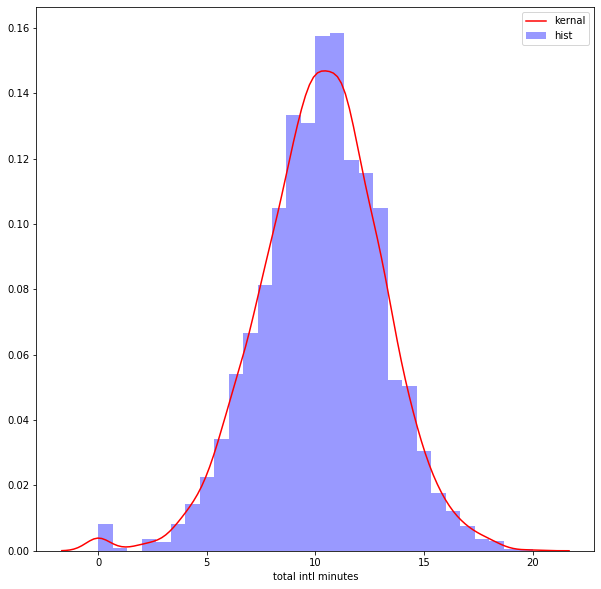

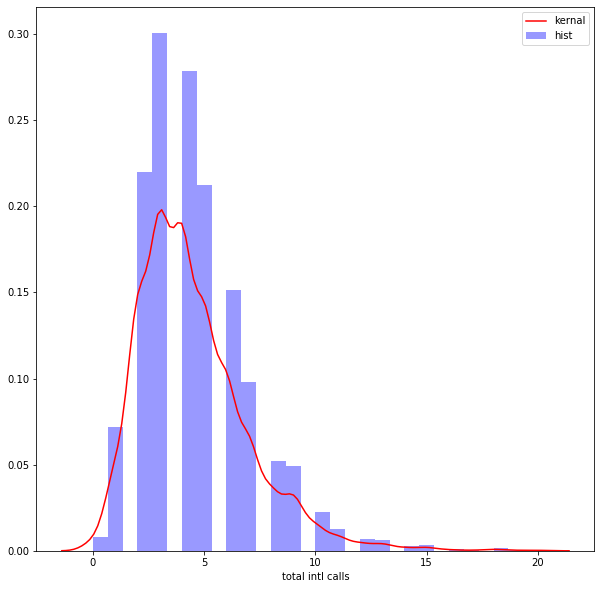

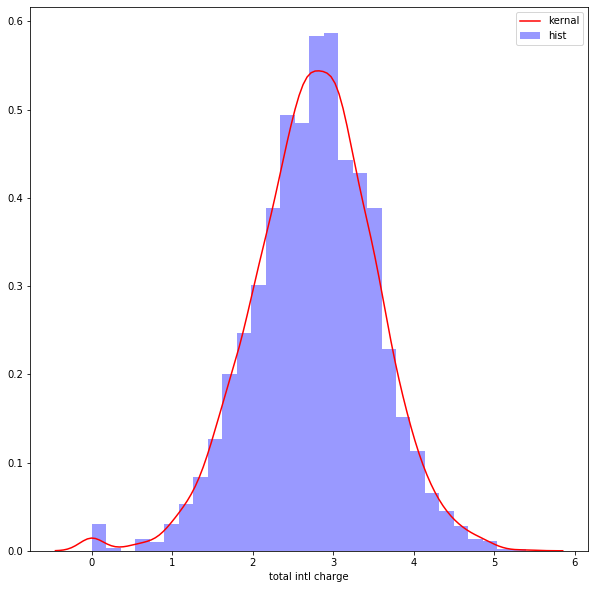

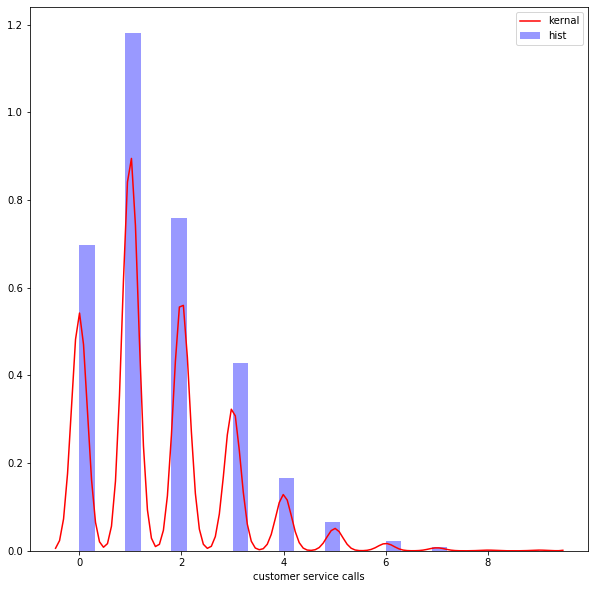

In [12]:
# посмотрим на распределения величин по признакам с помощью гистограмм и kde

l = [i for i in df_encoded.columns]

for i in range(len(l)):
    fig = plt.subplots(figsize=(10, 10))
    if i in [3]:
        sns.distplot(df_encoded[l[i]],bins = 10, kde=False,hist_kws={'color':'blue','label':'hist'}) 
    else:
        sns.distplot(df_encoded[l[i]],bins = 30, kde_kws={'color':'red','label':'kernal'}, 
            hist_kws={'color':'blue','label':'hist'})

По гистрограммам видно, что следующие признаки: account length, total day minutes, total night charge,
total eve calls, total intl charge, total night minutes, total intl minutes, total eve charge,
total day calls, total night calls, total eve minutes, total day charge имеют нормальное распределение 
с параметрами $M = mean(признак)$, $d^2 = std^2(признак)$ 

total intl calls можно считать нормальным (хотя это не совсем так)


In [13]:
# посмтроим матрицу корреляций, выбросим данные с единичной линейной зависимостью
# они просто повысят вычислительную сложность

df_encoded.corr()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
state,1.000000,0.012552,0.012886,-0.019448,-0.011709,0.016033,0.014496,-0.004411,0.014492,0.015681,0.017786,0.015697,-0.019224,-0.012109,-0.019210,-0.002416,-0.023096,-0.002509,-0.003961
account length,0.012552,1.000000,-0.012463,-0.024735,-0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area code,0.012886,-0.012463,1.000000,-0.048551,0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
international plan,-0.019448,-0.024735,-0.048551,1.000000,0.006006,-0.008745,-0.049396,-0.003755,-0.049398,-0.019100,-0.006114,-0.019106,0.028905,-0.012451,0.028913,-0.045871,-0.017366,-0.045780,0.024522
voice mail plan,-0.011709,-0.002918,0.000747,0.006006,1.000000,-0.956927,0.001684,0.011086,0.001686,-0.021545,0.006444,-0.021559,-0.006079,-0.015553,-0.006064,0.001318,-0.007618,0.001276,0.017824
number vmail messages,0.016033,-0.004628,-0.001994,-0.008745,-0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.014496,0.006216,-0.008264,-0.049396,0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,-0.004411,0.038470,-0.009646,-0.003755,0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.014492,0.006214,-0.008264,-0.049398,0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,0.015681,-0.006757,0.003580,-0.019100,-0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985


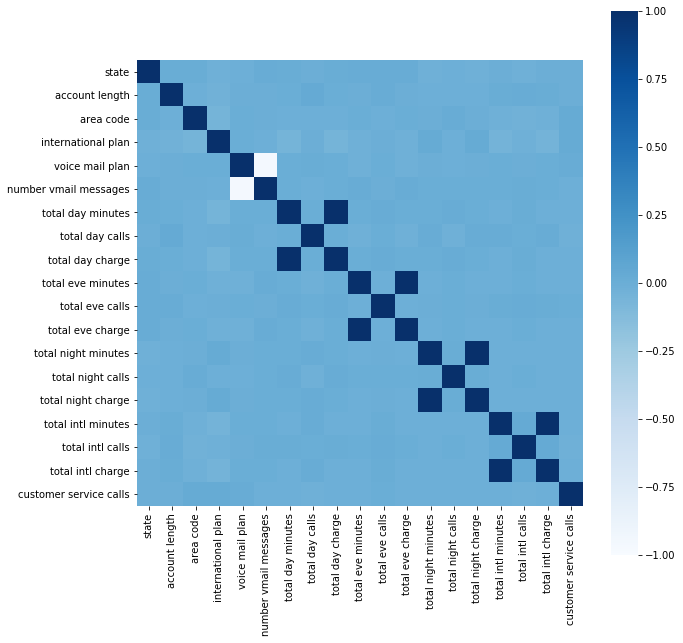

In [14]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_encoded.corr(), vmin=-1, cmap='Blues', square=True)
plt.show()

In [15]:
df_encoded = df_encoded.drop(['total day charge','total eve charge','total night charge','total intl charge'], axis= 1)
df_encoded

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,47,128,415,1,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,34,107,415,1,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,17,137,415,1,1,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,34,84,408,0,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,18,75,415,0,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,46,192,415,1,0,36,156.2,77,215.5,126,279.1,83,9.9,6,2
3329,0,68,415,1,1,0,231.1,57,153.4,55,191.3,123,9.6,4,3
3330,6,28,510,1,1,0,180.8,109,288.8,58,191.9,91,14.1,6,2
3331,38,184,510,0,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2


Датафрейм готов к обучению 